# Introduction

Sebuah dataset yang berisi transaksi pada retail e-commerce terbesar dari Pakistan. terdapat transaksi berjumlah hingga setengah juta yang diperoleh mulai dari Maret 2016 hingga Agustus 2018. 

# Problem Statement
Bagaimana meningkatkan penjualan sekaligus mengurangi jumlah jenis barang guna memperoleh keuntungan maksimum dengan biaya operasional seminimum mungkin.

# Data

In [1]:
# Melakukan import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import shapiro, normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

Dataset ini berisi informasi terkait seluruh element dari sebuah transaksi. Ada 26 kolom pada `Pakistan Largest Ecommerce Dataset` yaitu:

* Item_id : Kode unik dari setiap item
* Status : Status dari sebuah transaksi
* Created_at : Tanggal dilakukannya pemesanan barang
* Sku : Stock Keeping Unit yang diberikan kepada setiap item barang
* Price : Harga dari setiap item barang
* Qty_ordered : Jumlah total item barang dalam satu transaksi
* Grand_total : Jumlah total yang dibayar oleh customer
* Increment_id : Kode struk
* Category_name_1 : Pengelompokan setiap item barang dalam satu kategori
* Sales_commision_code : Kode komisi penjualan
* Discount_amount : Jumlah diskon yang diberikan
* Payment_method : Metode pembayaran
* Working_date : Jam kerja
* BI_Status : Memberikan informasi terkait kelanjutan proses pemesanan barang
* MV : Harga satuan produk
* Year : Tahun customer bergabung
* Month : Bulan customer bergabung
* Customer_since : Berisi keterangan waktu saat konsumen bergabung
* M-Y : Informasi tentang bulan dan tahun terjadinya transaksi
* FY : Tahun fiskal perusahaan
* Customer_ID : Kode unik untuk setiap konsumen
* Unnamed : 21 : Empty Column
* Unnamed : 22 : Empty Column
* Unnamed : 23 : Empty Column
* Unnamed : 24 : Empty Column
* Unnamed : 25 : Empty Column

In [2]:
# Melakukan import dataset
df=pd.read_csv('Pakistan Largest Ecommerce Dataset.csv')
display(df.head(),df.tail())

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,1.0,NaN,NaN,NaN,NaN,NaN
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,...,7.0,2016-7,7-2016,FY17,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,3.0,NaN,NaN,NaN,NaN,NaN
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,7.0,2016-7,7-2016,FY17,4.0,NaN,NaN,NaN,NaN,NaN
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,...,7.0,2016-7,7-2016,FY17,5.0,NaN,NaN,NaN,NaN,NaN


,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Understanding and Cleaning

Alangkah baiknya sebelum melakukan analisis, dilakukan pengenalan data secara menyeluruh terlebih dahulu agar dapat melakukan analisis dengan lebih baik

In [3]:
# Menampilkan nama kolom, jumlah data unik dan sampel masing - masing kolom
pd.set_option('display.max_colwidth', -1)

listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,item_id,584524,"[211131.0, 211133.0, 211134.0, 211135.0, 211136.0, 211137.0, 211138.0, 211139.0, 211140.0, 211141.0, 211142.0, 211143.0, 211144.0, 211145.0, 211146.0, 211147.0, 211149.0, 211150.0, 211151.0, 211152.0, 211153.0, 211154.0, 211155.0, 211156.0, 211157.0, 211158.0, 211160.0, 211162.0, 211163.0, 211164.0, 211166.0, 211168.0, 211169.0, 211170.0, 211171.0, 211172.0, 211173.0, 211174.0, 211175.0, 211176.0, 211177.0, 211179.0, 211180.0, 211182.0, 211184.0, 211185.0, 211186.0, 211187.0, 211188.0, 211189.0, 211190.0, 211191.0, 211192.0, 211193.0, 211194.0, 211196.0, 211197.0, 211198.0, 211199.0, 211200.0, 211202.0, 211201.0, 211203.0, 211204.0, 211205.0, 211206.0, 211207.0, 211208.0, 211209.0, 211211.0, 211212.0, 211213.0, 211214.0, 211215.0, 211217.0, 211218.0, 211219.0, 211220.0, 211221.0, 211222.0, 211223.0, 211225.0, 211224.0, 211226.0, 211227.0, 211228.0, 211229.0, 211230.0, 211231.0, 211232.0, 211233.0, 211234.0, 211235.0, 211236.0, 211237.0, 211238.0, 211239.0, 211240.0, 211241.0, 211242.0, ...]"
1,status,16,"[complete, canceled, order_refunded, received, refund, closed, fraud, holded, exchange, pending_paypal, paid, \N, cod, pending, nan, processing, payment_review]"
2,created_at,789,"[7/1/2016, 7/2/2016, 7/3/2016, 7/4/2016, 7/5/2016, 7/6/2016, 7/7/2016, 7/8/2016, 7/9/2016, 7/10/2016, 7/11/2016, 7/12/2016, 7/13/2016, 7/14/2016, 7/15/2016, 7/16/2016, 7/17/2016, 7/18/2016, 7/19/2016, 7/20/2016, 7/21/2016, 7/22/2016, 7/23/2016, 7/24/2016, 7/25/2016, 7/26/2016, 7/27/2016, 7/28/2016, 7/29/2016, 7/30/2016, 7/31/2016, 8/1/2016, 8/2/2016, 8/3/2016, 8/4/2016, 8/5/2016, 8/6/2016, 8/7/2016, 8/8/2016, 8/9/2016, 8/10/2016, 8/11/2016, 8/12/2016, 8/13/2016, 8/14/2016, 8/15/2016, 8/16/2016, 8/17/2016, 8/18/2016, 8/19/2016, 8/20/2016, 8/21/2016, 8/22/2016, 8/23/2016, 8/24/2016, 8/25/2016, 8/26/2016, 8/27/2016, 8/28/2016, 8/29/2016, 8/30/2016, 8/31/2016, 9/1/2016, 9/2/2016, 9/3/2016, 9/4/2016, 9/5/2016, 9/6/2016, 9/7/2016, 9/8/2016, 9/9/2016, 9/10/2016, 9/11/2016, 9/12/2016, 9/13/2016, 9/14/2016, 9/15/2016, 9/16/2016, 9/17/2016, 9/18/2016, 9/19/2016, 9/20/2016, 9/21/2016, 9/22/2016, 9/23/2016, 9/24/2016, 9/25/2016, 9/26/2016, 9/27/2016, 9/28/2016, 9/29/2016, 9/30/2016, 10/1/2016, 10/2/2016, 10/3/2016, 10/4/2016, 10/5/2016, 10/6/2016, 10/7/2016, 10/8/2016, ...]"
3,sku,84889,"[kreations_YI 06-L, kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Body Spray Free, Ego_UP0017-999-MR0, kcc_krone deal, BK7010400AG, UK_Namkino All In One 200 Gms, UK_Namkino Mix Nimco 400 Gms, Apple iPhone 6S 64GB, GFC_Pedestal Myga Cross Base (Special Guard) 24"", BK1070200PL, BK1130200CF, kcc_Sultanat, kcc_glamour deal, Assetmen_MD-346-M, cr_DATES WITH CASHEW-400 GM, UK_Gift Box Mix Dry Fruit Sweets 500 Gms, itter_AB 1199, RL_B005, bed&rest_S7, L&L_LLHLE8224S, J&J_JJR-4, J&J_JJR-20, D Lend a Helping Hand, Mochika_M0001112-12, Mochika_M0001112-8, SKMT_Blood Test, SKMT_Medicine, sputnik_701/5-11, Ctees-Black Zip- Up Hoodie-XL, Samsung Galaxy J5, Veet_4, RS_Gulab jaman Tin, cr_PEANUT SALTY-200 GM, Oriflame_21557, JBS_TAT-128, Ajmery_BRR-590-M, HOS_GUCFW75, Lexon_LL116B-Blue, kcc_Fantasy Perfumed Talcum Powder-200gm, 2Zee_SC6, Q MOBILE Noir X20, rehaab_RJ160047, Farah_3-B, RS_Sohan Halwa Tin, UK_Soan Papdi Original 250 Gms, UK_Gift Box Soghaat 500 Gms, RS_Double Delight, Al Muhafiz Sohan Halwa Almond, UK_Gift Box Baklawa 500 Gms, sputnik_2146/6-8, kkc_Kingtox 450ml Classic Green All Insect Killer Spray, Al Muhafiz Sohan Halwa Walnut, RS_Honey Dry Fruit Halwa, itter_AB 1214, Eco Star_40U557, Orient_OR-6057 GX LGFD LV, HOS_JPGCW100, kkc_Jasmine King Air Freshener, asimjofaeanew_5A, ajmery_F9-981, hijabh_JILBAB-C (1)-52x, noritake_NTM163M, RS_Habshi Halwa Tin, sentiments_WRK1612, bata_comfit-8613714-43-9, UK_Namkino Mix Nimco 8 Pcs Gift Pack, Inoxy_Inoxy Hair Miracle Elixir, RS_Chum Chum Tin, Dany_AUK-650 , urban_ PT004-L, jackpot_JP-7999, UK_Gift Box Pistachio Delight 500 Gms, test_tcsconnect, sst_Lyquin-Regular fit-Large, 

In [4]:
# Menampilkan informasi jumlah baris, kolom dan data di tiap kolomnya
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (1048575, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  float64
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  float64
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447349 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524

Secara umum, kita bisa melihat bahwa:
* dataset `Pakistan Largest Ecommerce Dataset` memiliki 26 kolom dan 1048575 baris
* Sejumlah kolom memiliki data kosong, yaitu, `status`, `sku`, `category_name_1`, `sales_commission_code`, `Customer Since`, dan `Customer ID`
* kolom `Unnamed` berisikan nilai kosong seluruhnya, sehingga melakukan penghapusan adalah keputusan terbaik.
* kolom `created_at` memiliki data tipe object. Namun setelah melihat nilai pada kolom ini, seharusnya berisikan data datetime.
* Terdapat spasi pada kolom ` MV`, sehingga dapat diperbaiki untuk penamaan kolom 

In [5]:
# Melakukan penghapusan kolom yang bernilai kosong
df.drop(columns=['Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25'], inplace=True)

Mengubah setiap nama kolom untuk memudahkan dalam proses pemrograman, seperti menghapus spasi di awal nama kolom dan merubah seluruh spasi diantara nama kolom menjadi underscore

In [6]:
# Melakukan perubahan nama kolom ` MV`
df.rename(columns={' MV ':'MV'},inplace=True)

In [7]:
# Merubah seluruh spasi(' ') pada nama kolom menjadi underscore('_')
df.columns=df.columns.str.replace(' ','_')

In [8]:
# Melakukan perubahan nama kolom `category`
df.rename(index=str, columns={'category_name_1': 'category'}, inplace=True)

Dikarenakan oleh tidak sesuainya tipe data untuk kolom `created_at`, maka diputuskan untuk merubah tipe data menjadi *datetime*

In [9]:
# Merubah tipe data kolom `created_at` menjadi datetime
df['created_at'] = pd.to_datetime(df.created_at, format='%m/%d/%Y')

In [10]:
# Menampilkan seluruh elemen unik pada kolom `status`
df['status'].unique()

array(['complete', 'canceled', 'order_refunded', 'received', 'refund',
       'closed', 'fraud', 'holded', 'exchange', 'pending_paypal', 'paid',
       '\\N', 'cod', 'pending', nan, 'processing', 'payment_review'],
      dtype=object)

Untuk menyederhanakan status pada setiap transaksi, maka dilakukan pengelompokan kembali pada status yang bermakna menyerupai

In [11]:
# Melakukan simplifikasi pada nilai dari kolom `status`
replace_status = {'received':'complete', 'exchange':'complete', 'paid':'pending','cod':'complete'
                  ,'payment_review':'pending','processing':'pending','payment_review':'pending','refund':'order_refunded', 'pending_paypal':'pending',
                  'closed':'canceled','refund':'order_refunded', 'pending_paypal':'order_refunded',
                 'fraud':'canceled', 'holded':'pending'} 
df = df.replace({"status": replace_status})

In [12]:
# Menampilkan seluruh elemen unik pada kolom `status`
df['status'].unique()

array(['complete', 'canceled', 'order_refunded', 'pending', '\\N', nan],
      dtype=object)

In [13]:
# Menampilkan seluruh elemen unik pada kolom `payment_method`
df['payment_method'].unique()

array(['cod', 'ublcreditcard', 'mygateway', 'customercredit',
       'cashatdoorstep', 'mcblite', 'internetbanking', 'marketingexpense',
       'productcredit', 'financesettlement', 'Payaxis', 'jazzvoucher',
       'jazzwallet', 'Easypay', 'Easypay_MA', 'easypay_voucher',
       'bankalfalah', 'apg', nan], dtype=object)

Pada `payment_method` dapat dilihat bahwa beberapa nilai pada kolom memiliki makna yang menyerupai seperti Easypay_MA, easypay_voucher dan Easypay. Oleh karena itu kita jadikan nilai tunggal untuk menyederhanakan analisis

In [14]:
# Melakukan simplifikasi pada nilai dari kolom `payment_method`
payment_to_replace = {'cashatdoorstep': 'cod', 'Easypay_MA':'Easypay', 'easypay_voucher':'Easypay','jazzwallet':'jazz','jazzvoucher':'jazz'} 
df = df.replace({"payment_method": payment_to_replace})

In [15]:
# Menampilkan seluruh elemen unik pada kolom `payment_method`
df['payment_method'].unique()

array(['cod', 'ublcreditcard', 'mygateway', 'customercredit', 'mcblite',
       'internetbanking', 'marketingexpense', 'productcredit',
       'financesettlement', 'Payaxis', 'jazz', 'Easypay', 'bankalfalah',
       'apg', nan], dtype=object)

In [16]:
# Menampilkan ringkasan data dari df
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   item_id                584524 non-null  float64       
 1   status                 584509 non-null  object        
 2   created_at             584524 non-null  datetime64[ns]
 3   sku                    584504 non-null  object        
 4   price                  584524 non-null  float64       
 5   qty_ordered            584524 non-null  float64       
 6   grand_total            584524 non-null  float64       
 7   increment_id           584524 non-null  object        
 8   category               584360 non-null  object        
 9   sales_commission_code  447349 non-null  object        
 10  discount_amount        584524 non-null  float64       
 11  payment_method         584524 non-null  object        
 12  Working_Date           584524 non-null  object 

## Data Duplikat
Data duplikat merupakan baris data yang memiliki nilai yang sama satu sama lain. Oleh karena itu perlu dilakukan pemeriksaan menyeluruh untuk menghindari adanya data duplikat 

In [17]:
# Memeriksa jumlah duplikat pada setiap kolom
df.duplicated().sum()

464050

In [18]:
# Melakukan akses baris data yang terindikasi duplikat
print(df[df.duplicated(keep=False)])

         item_id status created_at  sku  price  qty_ordered  grand_total  \
584524  NaN       NaN   NaT         NaN NaN    NaN          NaN            
584525  NaN       NaN   NaT         NaN NaN    NaN          NaN            
584526  NaN       NaN   NaT         NaN NaN    NaN          NaN            
584527  NaN       NaN   NaT         NaN NaN    NaN          NaN            
584528  NaN       NaN   NaT         NaN NaN    NaN          NaN            
...      ..       ...    ..         ...  ..     ..           ..            
1048570 NaN       NaN   NaT         NaN NaN    NaN          NaN            
1048571 NaN       NaN   NaT         NaN NaN    NaN          NaN            
1048572 NaN       NaN   NaT         NaN NaN    NaN          NaN            
1048573 NaN       NaN   NaT         NaN NaN    NaN          NaN            
1048574 NaN       NaN   NaT         NaN NaN    NaN          NaN            

        increment_id category sales_commission_code  ...  payment_method  \
584524   Na

Dapat dilihat bahwa sangat banyak baris data yang bernilai kosong pada setiap kolomnya, dengan menghapus baris data ini maka tidak hanya dapat menghapus data duplikat tapi juga mengatasi baris data bernilai kosong

In [19]:
# Melakukan penghapusan pada baris data yang bernilai kosong pada setiap kolomnya
df_new = df.dropna(how = 'all')

In [20]:
# Mencetak data duplikat pada df_new
print(df_new[df_new.duplicated(keep=False)])

Empty DataFrame
Columns: [item_id, status, created_at, sku, price, qty_ordered, grand_total, increment_id, category, sales_commission_code, discount_amount, payment_method, Working_Date, BI_Status, MV, Year, Month, Customer_Since, M-Y, FY, Customer_ID]
Index: []

[0 rows x 21 columns]


In [21]:
# Menampilkan ringkasan data dari df_new
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 584524 entries, 0 to 584523
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   item_id                584524 non-null  float64       
 1   status                 584509 non-null  object        
 2   created_at             584524 non-null  datetime64[ns]
 3   sku                    584504 non-null  object        
 4   price                  584524 non-null  float64       
 5   qty_ordered            584524 non-null  float64       
 6   grand_total            584524 non-null  float64       
 7   increment_id           584524 non-null  object        
 8   category               584360 non-null  object        
 9   sales_commission_code  447349 non-null  object        
 10  discount_amount        584524 non-null  float64       
 11  payment_method         584524 non-null  object        
 12  Working_Date           584524 non-null  object   

## Missing Value
Missing Value merupakan nilai kosong dalam data. Oleh karena itu perlu dilakukan pemeriksaan menyeluruh untuk menghindari adanya data bernilai kosong.

In [22]:
# persentase missing value di tiap kolom
df_new.isna().sum()/df_new.shape[0]*100

item_id                  0.000000 
status                   0.002566 
created_at               0.000000 
sku                      0.003422 
price                    0.000000 
qty_ordered              0.000000 
grand_total              0.000000 
increment_id             0.000000 
category                 0.028057 
sales_commission_code    23.467813
discount_amount          0.000000 
payment_method           0.000000 
Working_Date             0.000000 
BI_Status                0.000000 
MV                       0.000000 
Year                     0.000000 
Month                    0.000000 
Customer_Since           0.001882 
M-Y                      0.000000 
FY                       0.000000 
Customer_ID              0.001882 
dtype: float64

Dari output di atas, terdapat 6 kolom yang memiliki nilai kosong dimana `sales_commission_code` menjadi kolom dengan presentase nilai kosong yang sangat tinggi. Mari kita lihat jumlah tepat dari nilai kosong pada setiap kolom.

In [23]:
# Mencetak jumlah missing value pada setiap kolom
df_new.isnull().sum()

item_id                  0     
status                   15    
created_at               0     
sku                      20    
price                    0     
qty_ordered              0     
grand_total              0     
increment_id             0     
category                 164   
sales_commission_code    137175
discount_amount          0     
payment_method           0     
Working_Date             0     
BI_Status                0     
MV                       0     
Year                     0     
Month                    0     
Customer_Since           11    
M-Y                      0     
FY                       0     
Customer_ID              11    
dtype: int64

Mula - mula kita atasi nilai kosong pada kolom `status`

In [24]:
# Mencetak seluruh missing value pada kolom `status`
status_null = pd.isnull(df_new['status'])
df_new[status_null]

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category,sales_commission_code,...,payment_method,Working_Date,BI_Status,MV,Year,Month,Customer_Since,M-Y,FY,Customer_ID
477519,783751.0,NaN,2018-03-15,OTHPCB5A7D8A0BD10E8,8000.0,1.0,8000.0,100479380,Others,NaN,...,cod,3/15/2018,Gross,"8,000",2018.0,3.0,2018-3,3-2018,FY18,95141.0
513736,827187.0,NaN,2018-04-16,KABOXF5ABCC75C7E2F7-32,370.0,1.0,2707.0,100513933,Kids & Baby,NaN,...,cod,4/16/2018,Gross,370,2018.0,4.0,2018-4,4-2018,FY18,105059.0
513737,827189.0,NaN,2018-04-16,KABSHO5AA77C331466F-11-13 Years,473.0,1.0,2707.0,100513933,Kids & Baby,NaN,...,cod,4/16/2018,Gross,473,2018.0,4.0,2018-4,4-2018,FY18,105059.0
513738,827191.0,NaN,2018-04-16,KABBIN5A93E074C501A-8-9 Years,749.0,1.0,2707.0,100513933,Kids & Baby,NaN,...,cod,4/16/2018,Gross,749,2018.0,4.0,2018-4,4-2018,FY18,105059.0
513739,827193.0,NaN,2018-04-16,KABLIT59AC117FD51C4-12-13 Years,692.0,1.0,2707.0,100513933,Kids & Baby,NaN,...,cod,4/16/2018,Gross,692,2018.0,4.0,2018-4,4-2018,FY18,105059.0
513740,827195.0,NaN,2018-04-16,KABCOL5AB2B8019805C-8-9 Years,423.0,1.0,2707.0,100513933,Kids & Baby,NaN,...,cod,4/16/2018,Gross,423,2018.0,4.0,2018-4,4-2018,FY18,105059.0
518706,832777.0,NaN,2018-04-30,ENTCLI5A5DD7D800D6E,6042.0,1.0,6042.0,100517141,Entertainment,NaN,...,cod,4/30/2018,Gross,"6,042",2018.0,4.0,2018-4,4-2018,FY18,106036.0
532965,848003.0,NaN,2018-05-14,MATINF5AE310D2D7A1A,13950.0,1.0,13950.0,100527966,Mobiles & Tablets,NaN,...,cod,5/14/2018,Gross,"13,950",2018.0,5.0,2018-4,5-2018,FY18,105319.0
542146,857829.0,NaN,2018-05-25,ROO5AE983F2751EA,2280.0,1.0,2280.0,100534786,Superstore,NaN,...,cod,5/25/2018,Gross,"2,280",2018.0,5.0,2018-5,5-2018,FY18,109580.0
554962,872154.0,NaN,2018-06-15,BAGPHI5AA665985A58E,2900.0,1.0,949.0,100542483,Beauty & Grooming,NaN,...,bankalfalah,6/15/2018,Gross,"2,900",2018.0,6.0,2018-5,6-2018,FY18,109420.0


Tidak hanya bernilai kosong namun ada juga baris data berisi '\N' yang tidak dianggap nilai kosong oleh program namun tidak mempunyai arti apapun sehingga sulit untuk dianalisis. Oleh karena itu kita ubah menjadi missing value

In [25]:
df['status'].unique()

array(['complete', 'canceled', 'order_refunded', 'pending', '\\N', nan],
      dtype=object)

In [26]:
# Merubah seluruh nilai `\N` menjadi missing value
df_new['status']=df_new['status'].replace({'\\N' : np.NaN})

Kita memiliki asumsi bahwa apabila status pada sistem tidak teridentifikasi maka transaksi dibatalkan

In [27]:
# Mengisi seluruh nilai kosong dengan 'canceled'
df_new.fillna({'status':'canceled'},inplace=True)

In [28]:
df_new['status'].unique()

array(['complete', 'canceled', 'order_refunded', 'pending'], dtype=object)

kemudian kita akan mengatasi nilai kosong pada kolom `sku`

In [29]:
# Mencetak seluruh missing value pada kolom `sku`
sku_null = pd.isnull(df_new['sku'])
df_new[sku_null]

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category,sales_commission_code,...,payment_method,Working_Date,BI_Status,MV,Year,Month,Customer_Since,M-Y,FY,Customer_ID
14846,230008.0,canceled,2016-08-13,NaN,0.0,1.0,0.0,100160070,\N,\N,...,cod,8/13/2016,Gross,-,2016.0,8.0,2016-8,8-2016,FY17,3468.0
20676,236830.0,canceled,2016-09-01,NaN,0.0,1.0,0.0,100164902,\N,\N,...,cod,9/1/2016,Gross,-,2016.0,9.0,2016-8,9-2016,FY17,4369.0
39838,260006.0,canceled,2016-10-07,NaN,0.0,1.0,0.0,100181136,\N,\N,...,cod,10/7/2016,Gross,-,2016.0,10.0,2016-7,10-2016,FY17,939.0
39839,260007.0,canceled,2016-10-07,NaN,0.0,3.0,0.0,100181137,\N,\N,...,cod,10/7/2016,Gross,-,2016.0,10.0,2016-7,10-2016,FY17,939.0
39880,260061.0,canceled,2016-10-07,NaN,0.0,3.0,0.0,100181174,\N,\N,...,cod,10/7/2016,Gross,-,2016.0,10.0,2016-7,10-2016,FY17,939.0
124968,367292.0,order_refunded,2016-12-10,NaN,0.0,1.0,0.0,100247863,\N,\N,...,cod,12/10/2016,Valid,-,2016.0,12.0,2016-11,12-2016,FY17,26305.0
125636,368122.0,order_refunded,2016-12-12,NaN,0.0,1.0,0.0,100248364,\N,\N,...,cod,12/12/2016,Valid,-,2016.0,12.0,2016-7,12-2016,FY17,2246.0
125811,368362.0,order_refunded,2016-12-13,NaN,0.0,1.0,0.0,100248497,\N,\N,...,cod,12/13/2016,Valid,-,2016.0,12.0,2016-7,12-2016,FY17,251.0
149597,399798.0,order_refunded,2017-02-07,NaN,0.0,1.0,0.0,100267148,\N,\N,...,cod,2/7/2017,Valid,-,2017.0,2.0,2017-2,2-2017,FY17,33062.0
170249,426105.0,canceled,2017-03-21,NaN,0.0,1.0,6952.0,100281645,\N,\N,...,cod,3/21/2017,Gross,-,2017.0,3.0,2017-3,3-2017,FY17,38242.0


Dikarenakan oleh kolom yang berisi data nominal maka salah satu pengisian nilai kosong yang dapat dilakukan adalah metode forward fill agar tidak mempengaruhi analisis secara signifikan

In [30]:
# Mengisi seluruh nilai kosong menggunakan metode forward fill
df_new['sku'].fillna(method='ffill',inplace=True)

kemudian kita akan mengatasi nilai kosong pada kolom `category`

In [31]:
# Mencetak seluruh missing value pada kolom `category`
category_null = pd.isnull(df_new['category'])
df_new[category_null]

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category,sales_commission_code,...,payment_method,Working_Date,BI_Status,MV,Year,Month,Customer_Since,M-Y,FY,Customer_ID
425895,725194.0,order_refunded,2018-01-02,MEFQMO59B0942707B79-L,99.0,2.0,2.0,100442474,NaN,NaN,...,Easypay,1/2/2018,Valid,198,2018.0,1.0,2017-8,1-2018,FY18,59587.0
431194,731122.0,complete,2018-01-15,MEFQMO59B0942707B79-M,99.0,1.0,249.0,100445690,NaN,NaN,...,cod,1/15/2018,Valid,99,2018.0,1.0,2017-8,1-2018,FY18,59587.0
432492,732569.0,canceled,2018-01-19,MEFQMO59B0942707B79-M,99.0,1.0,249.0,100446481,NaN,NaN,...,bankalfalah,1/19/2018,Gross,99,2018.0,1.0,2017-3,1-2018,FY18,37311.0
432494,732572.0,canceled,2018-01-19,MEFQMO59B0942707B79-M,99.0,1.0,249.0,100446483,NaN,NaN,...,bankalfalah,1/19/2018,Gross,99,2018.0,1.0,2017-3,1-2018,FY18,37311.0
432496,732575.0,order_refunded,2018-01-19,MEFQMO59B0942707B79-M,99.0,1.0,249.0,100446485,NaN,NaN,...,cod,1/19/2018,Valid,99,2018.0,1.0,2018-1,1-2018,FY18,85633.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535572,850761.0,complete,2018-05-16,KABASA5ABC763F62E76,506.0,1.0,656.0,100530038,NaN,NaN,...,cod,5/16/2018,Valid,506,2018.0,5.0,2018-5,5-2018,FY18,108622.0
541927,857600.0,complete,2018-05-25,WOFASA5AE962A6DD038,199.0,1.0,1344.0,100534649,NaN,NaN,...,cod,5/25/2018,Valid,199,2018.0,5.0,2016-7,5-2018,FY18,2237.0
549314,865823.0,canceled,2018-06-04,MEFQMO59B0942707B79-M,99.0,1.0,249.0,100538795,NaN,NaN,...,Easypay,6/4/2018,Gross,99,2018.0,6.0,2018-1,6-2018,FY18,85385.0
568069,886699.0,canceled,2018-07-18,COMWD5AA8FF5851E73,314.0,1.0,464.0,100551503,NaN,NaN,...,Easypay,7/18/2018,Gross,314,2018.0,7.0,2018-7,7-2018,FY19,113144.0


Tidak hanya bernilai kosong namun ada juga baris data berisi '\N' yang tidak dianggap nilai kosong oleh program namun tidak mempunyai arti apapun sehingga sulit untuk dianalisis. Oleh karena itu kita ubah menjadi missing value

In [32]:
df['category']

0          Women's Fashion  
1          Beauty & Grooming
2          Women's Fashion  
3          Beauty & Grooming
4          Soghaat          
            ...             
1048570    NaN              
1048571    NaN              
1048572    NaN              
1048573    NaN              
1048574    NaN              
Name: category, Length: 1048575, dtype: object

In [33]:
# Merubah seluruh nilai `\N` menjadi missing value
df_new['category']=df_new['category'].replace({'\\N' : np.NaN})

Dikarenakan oleh kolom yang berisi data nominal maka salah satu pengisian nilai kosong yang dapat dilakukan adalah metode forward fill agar tidak mempengaruhi analisis secara signifikan

In [34]:
# Mengisi seluruh nilai kosong menggunakan metode forward fill
df_new['category'].fillna(method='ffill')

0         Women's Fashion  
1         Beauty & Grooming
2         Women's Fashion  
3         Beauty & Grooming
4         Soghaat          
           ...             
584519    Women's Fashion  
584520    Mobiles & Tablets
584521    Mobiles & Tablets
584522    Mobiles & Tablets
584523    Mobiles & Tablets
Name: category, Length: 584524, dtype: object

In [35]:
df_new['category'].fillna(method='ffill',inplace=True)

In [36]:
df_new['category'].unique()

array(["Women's Fashion", 'Beauty & Grooming', 'Soghaat',
       'Mobiles & Tablets', 'Appliances', 'Home & Living',
       "Men's Fashion", 'Kids & Baby', 'Others', 'Entertainment',
       'Computing', 'Superstore', 'Health & Sports', 'Books',
       'School & Education'], dtype=object)

kemudian kita akan mengatasi nilai kosong pada kolom `sales_commission_code`

In [37]:
# Mencetak seluruh missing value pada kolom `sales_commission_code`
commission_null = pd.isnull(df_new['sales_commission_code'])
df_new[commission_null]

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category,sales_commission_code,...,payment_method,Working_Date,BI_Status,MV,Year,Month,Customer_Since,M-Y,FY,Customer_ID
135887,381711.0,complete,2017-01-04,jockey_J260-1013-3-M,715.0,1.0,1714.0,100256851,Men's Fashion,NaN,...,cod,1/4/2017,Net,715,2017.0,1.0,2016-10,1-2017,FY17,11660.0
135888,381713.0,complete,2017-01-04,BO_nonRC-Jeep-Silver,250.0,1.0,1714.0,100256851,Kids & Baby,NaN,...,cod,1/4/2017,Net,250,2017.0,1.0,2016-10,1-2017,FY17,11660.0
135889,381714.0,complete,2017-01-04,aybeez_ABZ-3338-M,299.0,1.0,1714.0,100256851,Men's Fashion,NaN,...,cod,1/4/2017,Net,299,2017.0,1.0,2016-10,1-2017,FY17,11660.0
135890,381716.0,complete,2017-01-04,PC_3P COMBED-008,450.0,1.0,1714.0,100256851,Men's Fashion,NaN,...,cod,1/4/2017,Net,450,2017.0,1.0,2016-10,1-2017,FY17,11660.0
281723,557053.0,complete,2017-08-10,JSM_JSM-003-ComboGreenWhitePakShirt-M,180.0,2.0,360.0,100345578,Mobiles & Tablets,NaN,...,cod,8/10/2017,Net,360,2017.0,8.0,2016-11,8-2017,FY18,17022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584519,905204.0,complete,2018-08-28,WOFSCE5AE00357AECDE,699.0,1.0,849.0,100562385,Women's Fashion,NaN,...,cod,8/28/2018,Valid,699,2018.0,8.0,2018-8,8-2018,FY19,115320.0
584520,905205.0,pending,2018-08-28,MATHUA5AF70A7D1E50A,35599.0,1.0,35899.0,100562386,Mobiles & Tablets,NaN,...,bankalfalah,8/28/2018,Gross,"35,599",2018.0,8.0,2018-8,8-2018,FY19,115326.0
584521,905206.0,pending,2018-08-28,MATSAM5B6D7208C6D30,129999.0,2.0,652178.0,100562387,Mobiles & Tablets,NaN,...,bankalfalah,8/28/2018,Gross,"259,998",2018.0,8.0,2018-7,8-2018,FY19,113474.0
584522,905207.0,pending,2018-08-28,MATSAM5B1509B4696EA,87300.0,2.0,652178.0,100562387,Mobiles & Tablets,NaN,...,bankalfalah,8/28/2018,Gross,"174,600",2018.0,8.0,2018-7,8-2018,FY19,113474.0


In [38]:
df['sales_commission_code'].unique()

array(['\\N', 'R-FSD-52352', '105259', ..., 'GRS-4090974-1',
       'GRS-4090975-1', '100559728'], dtype=object)

Tidak hanya bernilai kosong namun ada juga baris data berisi '\N' yang tidak dianggap nilai kosong oleh program namun tidak mempunyai arti apapun sehingga sulit untuk dianalisis. Oleh karena itu kita ubah menjadi missing value

Kita memiliki asumsi bahwa apabila nilai pada kolom `sales_commission_code` bernilai '\N' maka diasumsikan bahwa tidak terdapat referral code dalam transaksi tersebut

In [39]:
# Merubah seluruh nilai `\N` menjadi missing value
df_new['sales_commission_code']=df_new['sales_commission_code'].replace({'\\N' : np.NaN})

In [40]:
# Mengisi seluruh nilai kosong dengan 'Commission None'
df_new.fillna({'sales_commission_code':'Commission None'},inplace=True)

In [41]:
df_new['sales_commission_code'].unique()

array(['Commission None', 'R-FSD-52352', '105259', ..., 'GRS-4090974-1',
       'GRS-4090975-1', '100559728'], dtype=object)

In [42]:
df_new.isnull().sum()

item_id                  0 
status                   0 
created_at               0 
sku                      0 
price                    0 
qty_ordered              0 
grand_total              0 
increment_id             0 
category                 0 
sales_commission_code    0 
discount_amount          0 
payment_method           0 
Working_Date             0 
BI_Status                0 
MV                       0 
Year                     0 
Month                    0 
Customer_Since           11
M-Y                      0 
FY                       0 
Customer_ID              11
dtype: int64

Kolom berisi nilai kosong yang tersisa adalah `Customer_Since` dan `Customer_ID`

In [43]:
customerS_null = pd.isnull(df_new['Customer_Since'])
df_new[customerS_null]

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category,sales_commission_code,...,payment_method,Working_Date,BI_Status,MV,Year,Month,Customer_Since,M-Y,FY,Customer_ID
427377,726862.0,order_refunded,2018-01-05,BAGLOR5A12C5C756AE5,209.0,1.0,1074.0,100443451,Beauty & Grooming,Commission None,...,cod,1/5/2018,Valid,209,2018.0,1.0,NaN,1-2018,FY18,NaN
427378,726863.0,order_refunded,2018-01-05,WOFGUL59C24CC9BE5D9,720.0,1.0,1074.0,100443451,Women's Fashion,Commission None,...,cod,1/5/2018,Valid,720,2018.0,1.0,NaN,1-2018,FY18,NaN
427379,726864.0,order_refunded,2018-01-05,BAGNAD59E0AAC250E6D,145.0,1.0,1074.0,100443451,Beauty & Grooming,Commission None,...,cod,1/5/2018,Valid,145,2018.0,1.0,NaN,1-2018,FY18,NaN
437567,738191.0,order_refunded,2018-01-31,MEFMUN5A0ACC3A894BE-9,999.0,1.0,1149.0,100449683,Men's Fashion,Commission None,...,cod,1/31/2018,Valid,999,2018.0,1.0,NaN,1-2018,FY18,NaN
478699,784981.0,complete,2018-03-15,OTHPCB5A7D8A0DA56C6,8000.0,2.0,16000.0,100480546,Others,Commission None,...,Payaxis,3/15/2018,Valid,"16,000",2018.0,3.0,NaN,3-2018,FY18,NaN
478779,785061.0,canceled,2018-03-15,OTHPCB5A7D8A0DA56C6,8000.0,2.0,16000.0,100480623,Others,Commission None,...,Easypay,3/15/2018,Gross,"16,000",2018.0,3.0,NaN,3-2018,FY18,NaN
494278,804621.0,canceled,2018-03-27,OTHPCB5AB351ED6A8F2,5000.0,2.0,10000.0,100496269,Others,Commission None,...,Easypay,3/27/2018,Gross,"10,000",2018.0,3.0,NaN,3-2018,FY18,NaN
495340,805750.0,canceled,2018-03-27,OTHPCB5AB351ECC7118,500.0,2.0,1000.0,100497359,Others,Commission None,...,Easypay,3/27/2018,Gross,"1,000",2018.0,3.0,NaN,3-2018,FY18,NaN
495945,807010.0,canceled,2018-03-27,OTHPCB5AB351EEC46EC,500.0,4.0,2000.0,100498582,Others,Commission None,...,Easypay,3/27/2018,Gross,"2,000",2018.0,3.0,NaN,3-2018,FY18,NaN
496921,808287.0,order_refunded,2018-03-27,MEFKAR5A7C138CE9EBD-L,1040.0,1.0,1040.0,100499821,Men's Fashion,Commission None,...,cod,3/27/2018,Valid,"1,040",2018.0,3.0,NaN,3-2018,FY18,NaN


In [44]:
# Mencetak seluruh missing value pada kolom `Customer_ID`
customerID_null = pd.isnull(df_new['Customer_ID'])
df_new[customerID_null]

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category,sales_commission_code,...,payment_method,Working_Date,BI_Status,MV,Year,Month,Customer_Since,M-Y,FY,Customer_ID
427377,726862.0,order_refunded,2018-01-05,BAGLOR5A12C5C756AE5,209.0,1.0,1074.0,100443451,Beauty & Grooming,Commission None,...,cod,1/5/2018,Valid,209,2018.0,1.0,NaN,1-2018,FY18,NaN
427378,726863.0,order_refunded,2018-01-05,WOFGUL59C24CC9BE5D9,720.0,1.0,1074.0,100443451,Women's Fashion,Commission None,...,cod,1/5/2018,Valid,720,2018.0,1.0,NaN,1-2018,FY18,NaN
427379,726864.0,order_refunded,2018-01-05,BAGNAD59E0AAC250E6D,145.0,1.0,1074.0,100443451,Beauty & Grooming,Commission None,...,cod,1/5/2018,Valid,145,2018.0,1.0,NaN,1-2018,FY18,NaN
437567,738191.0,order_refunded,2018-01-31,MEFMUN5A0ACC3A894BE-9,999.0,1.0,1149.0,100449683,Men's Fashion,Commission None,...,cod,1/31/2018,Valid,999,2018.0,1.0,NaN,1-2018,FY18,NaN
478699,784981.0,complete,2018-03-15,OTHPCB5A7D8A0DA56C6,8000.0,2.0,16000.0,100480546,Others,Commission None,...,Payaxis,3/15/2018,Valid,"16,000",2018.0,3.0,NaN,3-2018,FY18,NaN
478779,785061.0,canceled,2018-03-15,OTHPCB5A7D8A0DA56C6,8000.0,2.0,16000.0,100480623,Others,Commission None,...,Easypay,3/15/2018,Gross,"16,000",2018.0,3.0,NaN,3-2018,FY18,NaN
494278,804621.0,canceled,2018-03-27,OTHPCB5AB351ED6A8F2,5000.0,2.0,10000.0,100496269,Others,Commission None,...,Easypay,3/27/2018,Gross,"10,000",2018.0,3.0,NaN,3-2018,FY18,NaN
495340,805750.0,canceled,2018-03-27,OTHPCB5AB351ECC7118,500.0,2.0,1000.0,100497359,Others,Commission None,...,Easypay,3/27/2018,Gross,"1,000",2018.0,3.0,NaN,3-2018,FY18,NaN
495945,807010.0,canceled,2018-03-27,OTHPCB5AB351EEC46EC,500.0,4.0,2000.0,100498582,Others,Commission None,...,Easypay,3/27/2018,Gross,"2,000",2018.0,3.0,NaN,3-2018,FY18,NaN
496921,808287.0,order_refunded,2018-03-27,MEFKAR5A7C138CE9EBD-L,1040.0,1.0,1040.0,100499821,Men's Fashion,Commission None,...,cod,3/27/2018,Valid,"1,040",2018.0,3.0,NaN,3-2018,FY18,NaN


Disini terdapat asumsi bahwa 2 kolom saling berkaitan satu sama lain sehingga tidak ditemukan metode pengisian nilai kosong yang terbaik bagi kedua kolom sehingga menghapus missing value menjadi pilihan terbaik

In [45]:
# Menghapus seluruh missing value
df_new = df_new.dropna()

In [46]:
# Menampilkan jumlah missing value dari setiap kolom
df_new.isnull().sum()

item_id                  0
status                   0
created_at               0
sku                      0
price                    0
qty_ordered              0
grand_total              0
increment_id             0
category                 0
sales_commission_code    0
discount_amount          0
payment_method           0
Working_Date             0
BI_Status                0
MV                       0
Year                     0
Month                    0
Customer_Since           0
M-Y                      0
FY                       0
Customer_ID              0
dtype: int64

In [47]:
listItem = []
for col in df_new.columns :
    listItem.append([col, df_new[col].dtype, df_new[col].isna().sum(),
                    df_new[col].nunique(), list(df_new[col].drop_duplicates().sample(2).values)]);

df_newDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df_new.shape)
df_newDesc

(584513, 21)


,dataFeatures,dataType,null,unique,uniqueSample
0,item_id,float64,0,584513,"[813924.0, 842889.0]"
1,status,object,0,4,"[complete, order_refunded]"
2,created_at,datetime64[ns],0,789,"[2016-10-05T00:00:00.000000000, 2016-09-02T00:00:00.000000000]"
3,sku,object,0,84888,"[Contessa_CWC22_L, MATSHO5A3233F55AF8E]"
4,price,float64,0,9121,"[5001.0, 40490.0]"
5,qty_ordered,float64,0,74,"[16.0, 180.0]"
6,grand_total,float64,0,36829,"[687.85, 79950.0]"
7,increment_id,object,0,408776,"[100182169, 100247401]"
8,category,object,0,15,"[Health & Sports, Home & Living]"
9,sales_commission_code,object,0,7226,"[C-MUX-74978, c-pew-31067]"


Sebelum dibersihkan, kita memiliki 1,048,575 baris data, sekarang kita memiliki 584513 baris.

* sekitar 470,000 baris data yang kosong dihapus karena merupakan baris kosong / kolom kosong
* sekitar 21 data kosong dihapus karena tidak ditemukan metode terbaik dalam melakukan pengisian nilai kosong dan juga memiliki persentase kecil sehingga tidak akan berpengaruh banyak pada analisis data. 

## Export Data
Data yang telah dibersihkan secara menyeluruh kemudian dilakukan export menjadi format data excel untuk dilakukan visualisasi lebih lanjut pada Tableau

In [48]:
# df.to_excel("Pakistan_Ecommerce.xlsx")

## Data Outliers
Disini kita akan memeriksa apakah terdapat outliers pada kolom - kolom data yang berisi nilai numerik

In [49]:
# Membuat fungsi untuk memeriksa outliers
def Cek_Outliers(df_new, col):
    q1 = df_new[col].describe()['25%']
    q3 = df_new[col].describe()['75%']
    iqr = q3 - q1
    upper_fence = q3 + (1.5*iqr)
    lower_fence = q1 - (1.5*iqr)
    df_outliers = df_new[(df_new[col] < lower_fence) | (df_new[col] > upper_fence)]
    if len(df_outliers) == 0:
        return "No Outliers"
    else:
        return df_outliers

In [50]:
# Memeriksa outlier pada kolom `price`
df_outliers_price = Cek_Outliers(df_new,'price')
df_outliers_price

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category,sales_commission_code,...,payment_method,Working_Date,BI_Status,MV,Year,Month,Customer_Since,M-Y,FY,Customer_ID
8,211140.0,canceled,2016-07-01,Apple iPhone 6S 64GB,96499.0,1.0,96499.0,100147451,Mobiles & Tablets,Commission None,...,ublcreditcard,7/1/2016,Gross,"96,499",2016.0,7.0,2016-7,7-2016,FY17,8.0
9,211141.0,canceled,2016-07-01,Apple iPhone 6S 64GB,96499.0,1.0,96499.0,100147452,Mobiles & Tablets,Commission None,...,mygateway,7/1/2016,Gross,"96,499",2016.0,7.0,2016-7,7-2016,FY17,8.0
31,211168.0,complete,2016-07-01,Samsung Galaxy J5,20999.0,1.0,20999.0,100147466,Mobiles & Tablets,R-FSD-58130,...,cod,7/1/2016,Net,"20,999",2016.0,7.0,2016-7,7-2016,FY17,20.0
60,211202.0,order_refunded,2016-07-01,Eco Star_40U557,30417.0,1.0,30417.0,100147486,Entertainment,c-uet-44938,...,cod,7/1/2016,Valid,"30,417",2016.0,7.0,2016-7,7-2016,FY17,36.0
63,211204.0,complete,2016-07-01,Orient_OR-6057 GX LGFD LV,45250.0,1.0,45250.0,100147488,Appliances,R-KHS-104405,...,cod,7/1/2016,Net,"45,250",2016.0,7.0,2016-7,7-2016,FY17,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584497,905179.0,pending,2018-08-28,APPCHA5AF14939B8F8A,44199.0,1.0,44499.0,100562365,Appliances,Commission None,...,Easypay,8/28/2018,Valid,"44,199",2018.0,8.0,2018-8,8-2018,FY19,115323.0
584520,905205.0,pending,2018-08-28,MATHUA5AF70A7D1E50A,35599.0,1.0,35899.0,100562386,Mobiles & Tablets,Commission None,...,bankalfalah,8/28/2018,Gross,"35,599",2018.0,8.0,2018-8,8-2018,FY19,115326.0
584521,905206.0,pending,2018-08-28,MATSAM5B6D7208C6D30,129999.0,2.0,652178.0,100562387,Mobiles & Tablets,Commission None,...,bankalfalah,8/28/2018,Gross,"259,998",2018.0,8.0,2018-7,8-2018,FY19,113474.0
584522,905207.0,pending,2018-08-28,MATSAM5B1509B4696EA,87300.0,2.0,652178.0,100562387,Mobiles & Tablets,Commission None,...,bankalfalah,8/28/2018,Gross,"174,600",2018.0,8.0,2018-7,8-2018,FY19,113474.0


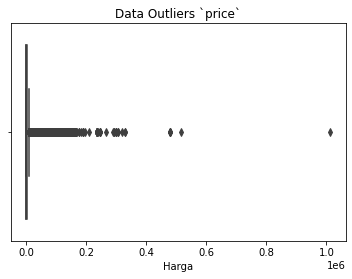

In [51]:
# Mencetak diagram kotak garis dengan 'price' sebagai sumbu x nya
sns.boxplot(data=df_new, x='price')
plt.title('Data Outliers `price`')
plt.xlabel('Harga')
plt.show()

In [52]:
Mindf_outliers_price=df_outliers_price['price'].min()
Maxdf_outliers_price=df_outliers_price['price'].max()
print(f'Terdapat outlier pada kolom data `price` dengan nilai kurang dari sama dengan {Mindf_outliers_price} dan lebih dari sama dengan {Maxdf_outliers_price}')

Terdapat outlier pada kolom data `price` dengan nilai kurang dari sama dengan 9650.0 dan lebih dari sama dengan 1012625.9


Dari grafik diatas dapat dilihat bahwa terdapat outliers dengaan nilai harga diatas 1012625.9, namun nilai - nilai tersebut terbilang wajar untuk sebuah item sehingga tidak perlu dilakukan manipulasi lebih lanjut

In [53]:
# Memeriksa outlier pada kolom `qty_ordered`
df_outliers_qty = Cek_Outliers(df_new,'qty_ordered')
df_outliers_qty

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category,sales_commission_code,...,payment_method,Working_Date,BI_Status,MV,Year,Month,Customer_Since,M-Y,FY,Customer_ID
4,211136.0,order_refunded,2016-07-01,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,Commission None,...,cod,7/1/2016,Valid,"1,110",2016.0,7.0,2016-7,7-2016,FY17,5.0
28,211163.0,complete,2016-07-01,SKMT_Medicine,100.0,5.0,0.0,100147463,Others,Commission None,...,customercredit,7/1/2016,Net,500,2016.0,7.0,2016-7,7-2016,FY17,16.0
29,211164.0,canceled,2016-07-01,sputnik_701/5-11,1500.0,2.0,3000.0,100147464,Men's Fashion,Commission None,...,cod,7/1/2016,Gross,"3,000",2016.0,7.0,2016-7,7-2016,FY17,18.0
48,211188.0,canceled,2016-07-01,RS_Sohan Halwa Tin,300.0,2.0,2210.0,100147477,Soghaat,Commission None,...,cod,7/1/2016,Gross,600,2016.0,7.0,2016-7,7-2016,FY17,28.0
49,211189.0,canceled,2016-07-01,UK_Soan Papdi Original 250 Gms,150.0,2.0,2210.0,100147477,Soghaat,Commission None,...,cod,7/1/2016,Gross,300,2016.0,7.0,2016-7,7-2016,FY17,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584490,905170.0,pending,2018-08-28,BAGPAR5AE95DB431B61,520.0,2.0,1889.0,100562359,Beauty & Grooming,Commission None,...,Payaxis,8/28/2018,Valid,"1,040",2018.0,8.0,2017-11,8-2018,FY19,67966.0
584516,905199.0,pending,2018-08-28,MATINF59BAB39FDBEF1,6760.0,2.0,13770.0,100562382,Mobiles & Tablets,Commission None,...,jazz,8/28/2018,Gross,"13,520",2018.0,8.0,2016-9,8-2018,FY19,8123.0
584521,905206.0,pending,2018-08-28,MATSAM5B6D7208C6D30,129999.0,2.0,652178.0,100562387,Mobiles & Tablets,Commission None,...,bankalfalah,8/28/2018,Gross,"259,998",2018.0,8.0,2018-7,8-2018,FY19,113474.0
584522,905207.0,pending,2018-08-28,MATSAM5B1509B4696EA,87300.0,2.0,652178.0,100562387,Mobiles & Tablets,Commission None,...,bankalfalah,8/28/2018,Gross,"174,600",2018.0,8.0,2018-7,8-2018,FY19,113474.0


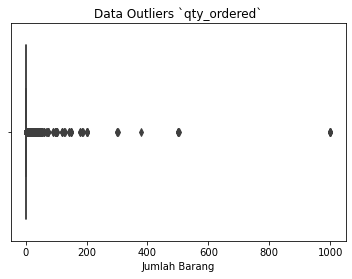

In [54]:
# Mencetak diagram kotak garis dengan 'qty_ordered' sebagai sumbu x nya
sns.boxplot(data=df_new, x='qty_ordered')
plt.title('Data Outliers `qty_ordered`')
plt.xlabel('Jumlah Barang')
plt.show()

In [55]:
Mindf_outliers_qty=df_outliers_price['qty_ordered'].min()
Maxdf_outliers_qty=df_outliers_price['qty_ordered'].max()
print(f'Terdapat outlier pada kolom data `qty_ordered` dengan nilai kurang dari sama dengan {Mindf_outliers_qty} dan lebih dari sama dengan {Maxdf_outliers_qty}')

Terdapat outlier pada kolom data `qty_ordered` dengan nilai kurang dari sama dengan 1.0 dan lebih dari sama dengan 34.0


Dari grafik diatas dapat dilihat bahwa terdapat outliers dengaan jumlah item setiap transaksi lebih dari 34, namun jumlah tersebut terbilang wajar untuk sebuah transaksi sehingga tidak perlu dilakukan manipulasi lebih lanjut

In [56]:
# Memeriksa outlier pada kolom `grand_total`
df_outliers_total = Cek_Outliers(df_new,'grand_total')
df_outliers_total

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category,sales_commission_code,...,payment_method,Working_Date,BI_Status,MV,Year,Month,Customer_Since,M-Y,FY,Customer_ID
8,211140.0,canceled,2016-07-01,Apple iPhone 6S 64GB,96499.0,1.0,96499.0,100147451,Mobiles & Tablets,Commission None,...,ublcreditcard,7/1/2016,Gross,"96,499",2016.0,7.0,2016-7,7-2016,FY17,8.0
9,211141.0,canceled,2016-07-01,Apple iPhone 6S 64GB,96499.0,1.0,96499.0,100147452,Mobiles & Tablets,Commission None,...,mygateway,7/1/2016,Gross,"96,499",2016.0,7.0,2016-7,7-2016,FY17,8.0
31,211168.0,complete,2016-07-01,Samsung Galaxy J5,20999.0,1.0,20999.0,100147466,Mobiles & Tablets,R-FSD-58130,...,cod,7/1/2016,Net,"20,999",2016.0,7.0,2016-7,7-2016,FY17,20.0
60,211202.0,order_refunded,2016-07-01,Eco Star_40U557,30417.0,1.0,30417.0,100147486,Entertainment,c-uet-44938,...,cod,7/1/2016,Valid,"30,417",2016.0,7.0,2016-7,7-2016,FY17,36.0
63,211204.0,complete,2016-07-01,Orient_OR-6057 GX LGFD LV,45250.0,1.0,45250.0,100147488,Appliances,R-KHS-104405,...,cod,7/1/2016,Net,"45,250",2016.0,7.0,2016-7,7-2016,FY17,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584497,905179.0,pending,2018-08-28,APPCHA5AF14939B8F8A,44199.0,1.0,44499.0,100562365,Appliances,Commission None,...,Easypay,8/28/2018,Valid,"44,199",2018.0,8.0,2018-8,8-2018,FY19,115323.0
584520,905205.0,pending,2018-08-28,MATHUA5AF70A7D1E50A,35599.0,1.0,35899.0,100562386,Mobiles & Tablets,Commission None,...,bankalfalah,8/28/2018,Gross,"35,599",2018.0,8.0,2018-8,8-2018,FY19,115326.0
584521,905206.0,pending,2018-08-28,MATSAM5B6D7208C6D30,129999.0,2.0,652178.0,100562387,Mobiles & Tablets,Commission None,...,bankalfalah,8/28/2018,Gross,"259,998",2018.0,8.0,2018-7,8-2018,FY19,113474.0
584522,905207.0,pending,2018-08-28,MATSAM5B1509B4696EA,87300.0,2.0,652178.0,100562387,Mobiles & Tablets,Commission None,...,bankalfalah,8/28/2018,Gross,"174,600",2018.0,8.0,2018-7,8-2018,FY19,113474.0


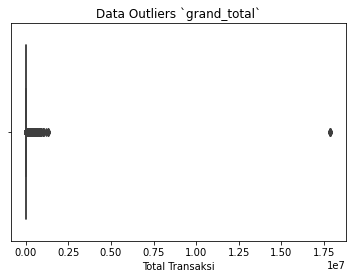

In [57]:
# Mencetak diagram kotak garis dengan 'price' sebagai sumbu x nya
sns.boxplot(data=df_new, x='grand_total')
plt.title('Data Outliers `grand_total`')
plt.xlabel('Total Transaksi')
plt.show()

In [58]:
Mindf_outliers_total=df_outliers_price['grand_total'].min()
Maxdf_outliers_total=df_outliers_price['grand_total'].max()
print(f'Terdapat outlier pada kolom data `grand_total` dengan nilai kurang dari sama dengan {Mindf_outliers_total} dan lebih dari sama dengan {Maxdf_outliers_total}')

Terdapat outlier pada kolom data `grand_total` dengan nilai kurang dari sama dengan -1594.0 dan lebih dari sama dengan 1315875.0


Dari grafik diatas dapat dilihat bahwa terdapat outliers dengaan total  transaksi lebih dari 1315875.0, namun total transaksi tersebut terbilang wajar untuk sebuah transaksi sehingga tidak perlu dilakukan manipulasi lebih lanjut

# Data Analysis

Dilakukan uji Shapiro Wilk Test, yaitu uji paling kuat untuk menguji distribusi normal.

In [59]:
def distribution_test(coloumn):
    sw_statistic, sw_pvalue = shapiro(coloumn)
    print(f'p-value {coloumn.name} : {sw_pvalue:.5f}' )
    
    if sw_pvalue > 0.05:
        print(f'Kolom {coloumn.name}. Asumsi Terdistribusi Normal')
    else:
        print(f'Kolom {coloumn.name}. Asumsi Tidak Terdistribusi Normal')
 
distribution_test(df_new['price'])
distribution_test(df_new['qty_ordered'])
distribution_test(df_new['grand_total'])
distribution_test(df_new['discount_amount'])

p-value price : 0.00000
Kolom price. Asumsi Tidak Terdistribusi Normal
p-value qty_ordered : 0.00000
Kolom qty_ordered. Asumsi Tidak Terdistribusi Normal
p-value grand_total : 0.00000
Kolom grand_total. Asumsi Tidak Terdistribusi Normal
p-value discount_amount : 0.00000
Kolom discount_amount. Asumsi Tidak Terdistribusi Normal


Dapat dilihat dari hasil pengujian bahwa kolom - kolom tersebut terdistribusi tidak normal.

In [60]:
df_new.describe().drop(['item_id','Year','Month','Customer_ID'], axis=1).loc[['count','mean','50%']].round(2)

,price,qty_ordered,grand_total,discount_amount
count,584513.00,584513.0,584513.00,584513.0
mean,6348.82,1.3,8530.68,499.5
50%,899.00,1.0,1960.40,0.0


Setelah dilakukan analisis statistik deskriptif, diketahui bahwa rata - rata konsumen hanya membeli 1(satu) barang setiap transaksi. Lalu lebih dari 50% konsumen membeli barang yang memiliki harga kurang dari Rs 900

### Total Pendapatan Berdasarkan Kategori Barang

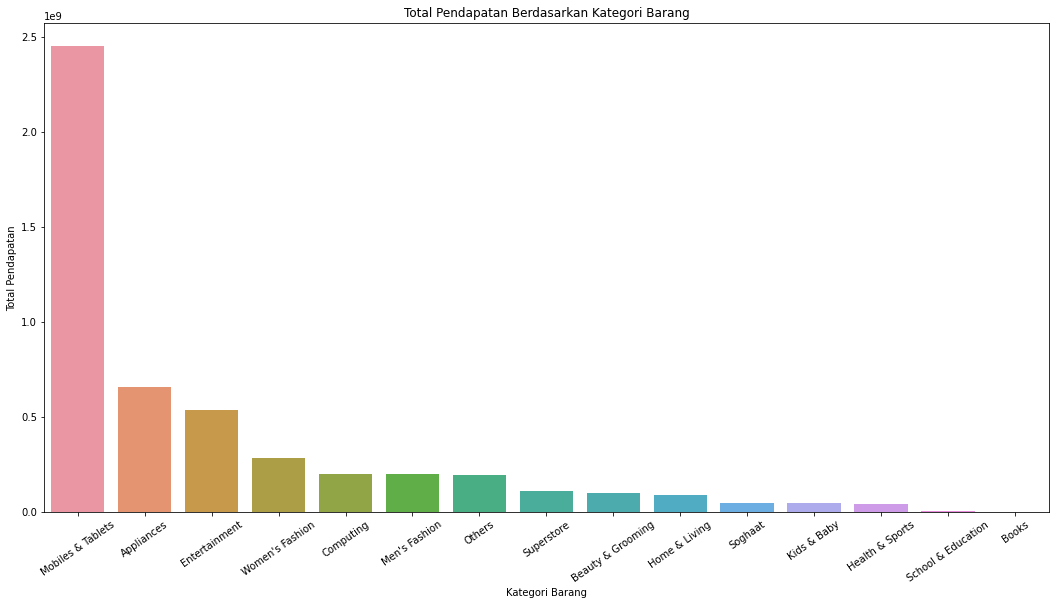

In [61]:
plt.figure(figsize = (18,9))
category_total = df_new[['grand_total','category']].groupby('category').sum().reset_index()
sns.barplot(data=category_total, y='grand_total', x='category', order=category_total.sort_values(by='grand_total' ,ascending=False)['category'])
plt.xticks(rotation=35)
plt.title('Total Pendapatan Berdasarkan Kategori Barang')
plt.xlabel('Kategori Barang')
plt.ylabel('Total Pendapatan')
plt.show()
            

Dapat dilihat bahwa kategori mobiles & tablets menjadi kategori dengan total pendapatan tertinggi sedangkan kategori buku menempati urutan terakhir dengaan total pendapatan terendah

### Jumlah Transaksi Berdasarkan Kategori Barang

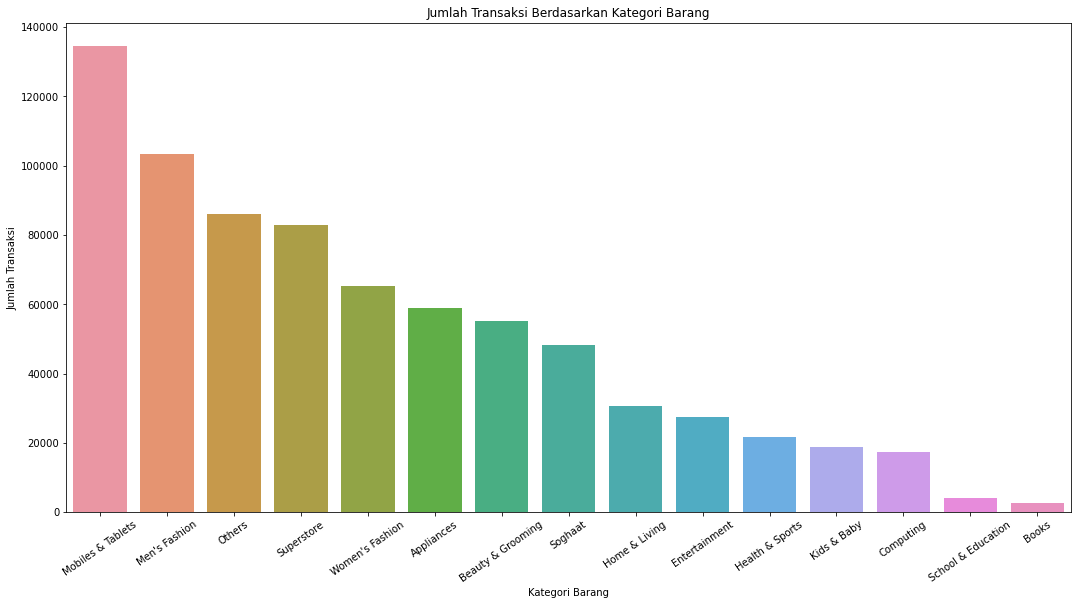

In [62]:
plt.figure(figsize = (18,9))
category_qty = df_new[['qty_ordered','category']].groupby('category').sum().reset_index()
sns.barplot(data=category_qty, y='qty_ordered', x='category', order=category_qty.sort_values(by='qty_ordered' ,ascending=False)['category'])
plt.xticks(rotation=35)
plt.title('Jumlah Transaksi Berdasarkan Kategori Barang')
plt.xlabel('Kategori Barang')
plt.ylabel('Jumlah Transaksi')
plt.show()
            

Dapat dilihat bahwa kategori mobiles & tablets juga menjadi kategori dengan jumlah transaksi terbanyak dan kategori buku juga menempati urutan terakhir dengaan jumlah transaksi terendah

### Jumlah Transaksi Berdasarkan Status Transaksi

In [65]:
df_new['status'].value_counts()

complete          313837
canceled          201767
order_refunded    67581 
pending           1328  
Name: status, dtype: int64

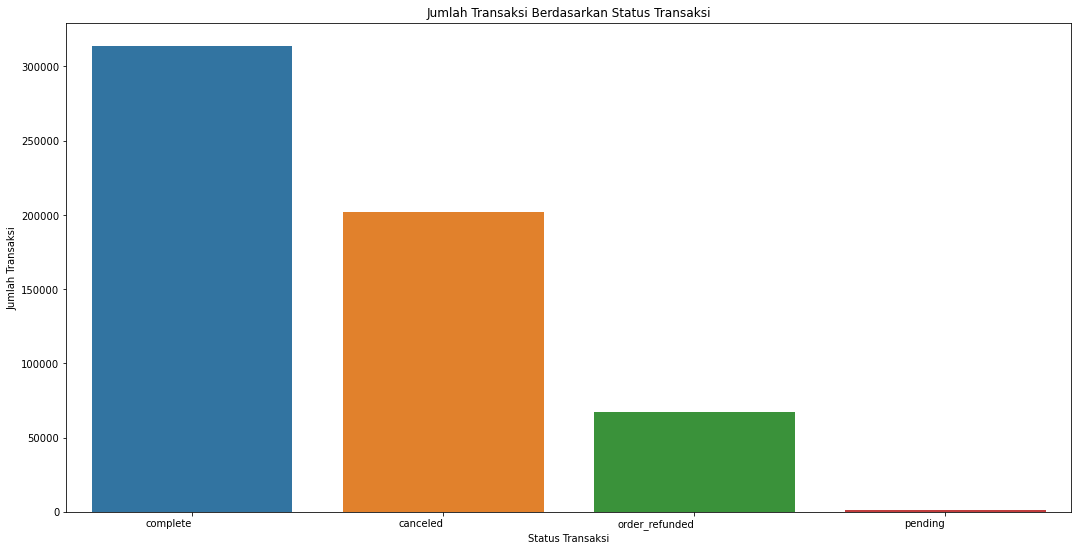

In [66]:
plt.figure(figsize = (18,9))
chart = sns.countplot(df_new['status'])

chart.set_xticklabels(chart.get_xticklabels(), horizontalalignment='right')
plt.title('Jumlah Transaksi Berdasarkan Status Transaksi')
plt.xlabel('Status Transaksi')
plt.ylabel('Jumlah Transaksi')
plt.show()

## Jumlah Transaksi Pada Kategori Berdasarkan Status Transaksi

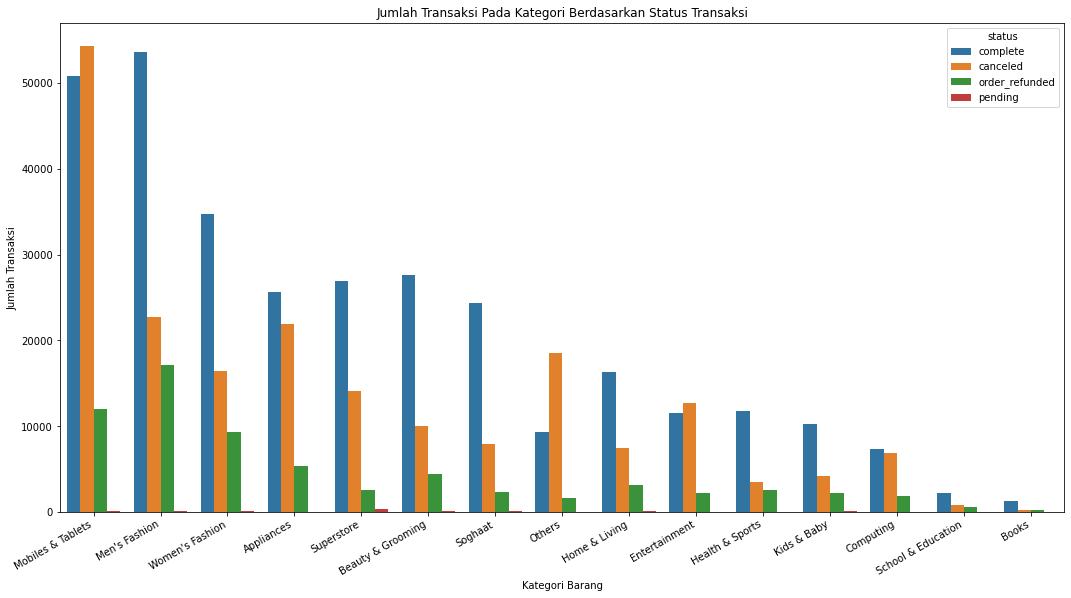

In [67]:
plt.figure(figsize = (18,9))
ax = sns.countplot(x="category", hue="status", data=df_new, order = df_new['category'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.title('Jumlah Transaksi Pada Kategori Berdasarkan Status Transaksi')
plt.xlabel('Kategori Barang')
plt.ylabel('Jumlah Transaksi')
plt.show()

Kategori Mobiles & Tablets menempati peringkat pertama dengan jumlah transaksi yang dibatalkan terbanyak hingga melebihi jumlah transaksi yang berhasil

### Peringkat Kategori Dengan Pendapatan Tertinggi Dari Transaksi Yang Terdapat Discount

In [68]:
df2 = df_new[['category','grand_total','discount_amount']]
df2 = pd.DataFrame(df2)
df2 = df2[df2['discount_amount'] != 0.0]
df2['discount_amount'].unique()

array([300.   ,  82.5  , 217.5  , ..., 381.375, 634.125, 355.35 ])

Mula - mula kita membuat dataframe berisi kolom 'grand_total', 'category' dan 'sales_commission_code' tanpa nilai 0.0(nol) pada kolom `discount_amount`

In [71]:
category_disc= df2.groupby('category')[['grand_total', 'discount_amount','category']].max().sort_values(by='grand_total',ascending=False)[['grand_total','discount_amount']]
category_disc=pd.DataFrame(category_disc.reset_index())
category_disc

,category,grand_total,discount_amount
0,Mobiles & Tablets,888065.00,50355.25
1,Appliances,678892.00,25093.80
2,Entertainment,678892.00,90300.00
3,Men's Fashion,474800.00,45000.00
4,Computing,472414.00,29025.00
5,Home & Living,154000.00,16450.00
6,Women's Fashion,140545.35,16450.00
7,Beauty & Grooming,140252.87,13146.13
8,Others,139000.00,8576.91
9,Superstore,93989.10,21000.00


Dilakukan pengelompokan nilai pada kolom `grand_total` dan `discount_amount` terhadap `category` lalu diurutkan berdasarkan perolehan tertinggi

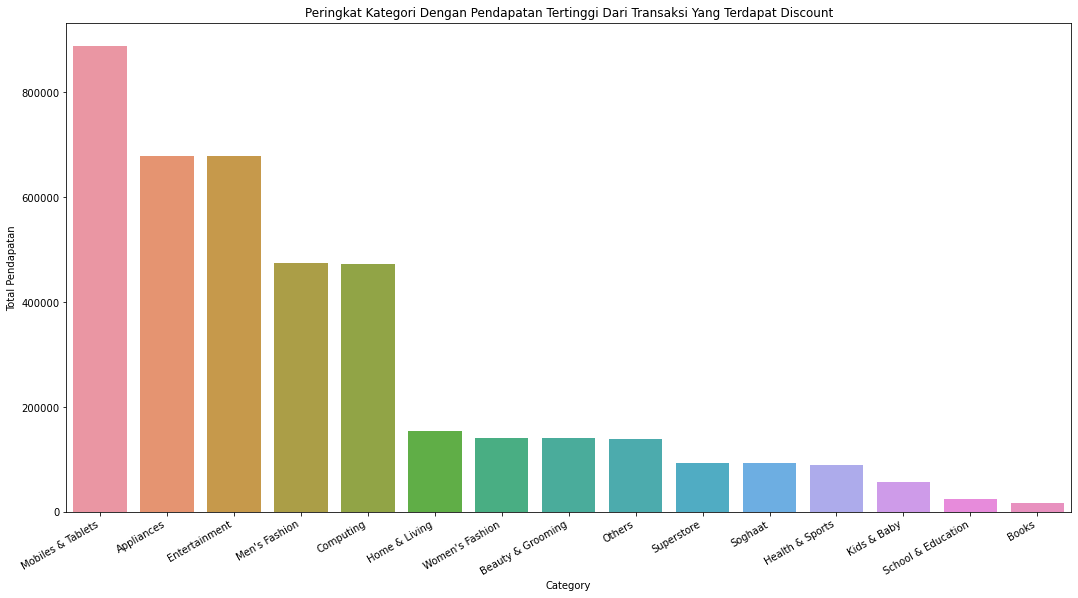

In [72]:
plt.figure(figsize = (18,9))
ax = sns.barplot(x="category", data=category_disc, y='grand_total')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.title('Peringkat Kategori Dengan Pendapatan Tertinggi Dari Transaksi Yang Terdapat Discount')
plt.xlabel('Category')
plt.ylabel('Total Pendapatan')
plt.show()

### Metode Pembayaran Dengan Jumlah Transaksi Terbanyak

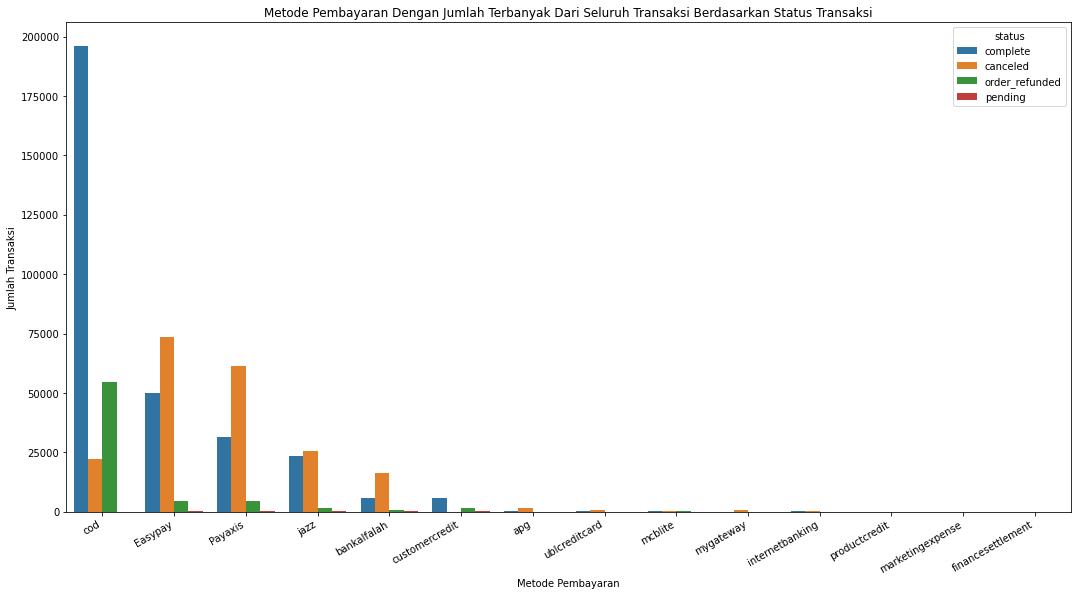

In [73]:
plt.figure(figsize = (18,9))
ax = sns.countplot(x="payment_method", hue="status", data=df_new, order = df_new['payment_method'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
sns.move_legend(ax, "upper right")
plt.title('Metode Pembayaran Dengan Jumlah Terbanyak Dari Seluruh Transaksi Berdasarkan Status Transaksi')
plt.xlabel('Metode Pembayaran')
plt.ylabel('Jumlah Transaksi')
plt.show()

### Total Pendapatan Pada 2016 - 2018

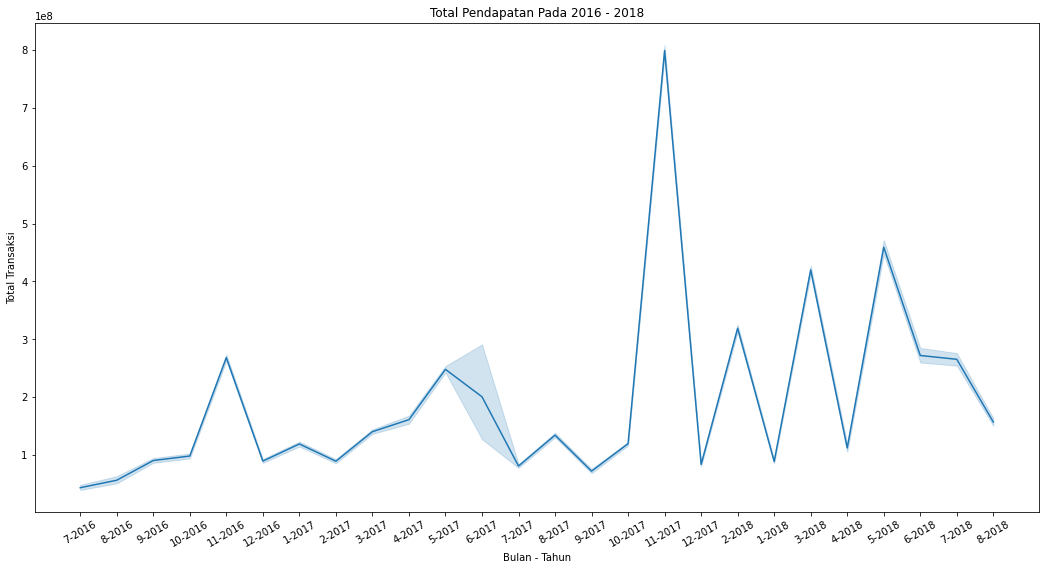

In [74]:
plt.figure(figsize = (18,9))
sns.lineplot(data=df_new, x='M-Y', y='grand_total', estimator='sum')
plt.xticks(rotation=30)
plt.title('Total Pendapatan Pada 2016 - 2018')
plt.xlabel('Bulan - Tahun')
plt.ylabel('Total Transaksi')
plt.show()

Pada bulan november tahun 2017 berhasil mencetak total penjualan tertinggi dalam rentang waktu mulai bulan July tahun 2016 hingga Agustus tahun 2018

Metode pembayaran 'cash on delivery' menjadi metode pembayaran dengan jumlah transaksi terbanyak juga memperoleh jumlah transaksi selesai tertinggi

### Referral Code Dengan Pendapatan Tertinggi

In [76]:
df_new['sales_commission_code']

0         Commission None
1         Commission None
2         Commission None
3         R-FSD-52352    
4         Commission None
               ...       
584519    Commission None
584520    Commission None
584521    Commission None
584522    Commission None
584523    Commission None
Name: sales_commission_code, Length: 584513, dtype: object

In [77]:
df_new['sales_commission_code'].value_counts()

Commission None    476165
40968              2710  
C-LHW-50074        2434  
C-RWP-31924        1720  
cisb30211          1613  
                   ...   
100278139          1     
rwp-wah-104124     1     
C-FSD-42199        1     
Cfsd43702          1     
C LHE 45016        1     
Name: sales_commission_code, Length: 7226, dtype: int64

In [78]:
df1 = df_new[['grand_total','sales_commission_code']]
df1 = pd.DataFrame(df1)
df1 = df1[df1['sales_commission_code'] != 'Commission None']
df1['sales_commission_code'].unique()

array(['R-FSD-52352', '105259', 'R-KHW-104406', ..., 'GRS-4090974-1',
       'GRS-4090975-1', '100559728'], dtype=object)

Mula - mula kita membuat dataframe berisi kolom 'grand_total' dan 'sales_commission_code' tanpa nilai 'Commission None' pada kolom `sales_commission_code`

In [83]:
df_new.groupby('sales_commission_code')[['grand_total']].max().sort_values(by='grand_total',ascending=False)

,grand_total
sales_commission_code,
Commission None,17888000.0
R-KHS-103986,1039479.0
asd,599599.0
C-KHC-34670,495960.0
25000,470000.0
...,...
GRS-3702361-1,0.0
GRS-3697223-1,0.0
GRS - 3042806-12,0.0


In [79]:
df1.groupby('sales_commission_code')[['grand_total']].max().sort_values(by='grand_total',ascending=False)

,grand_total
sales_commission_code,
R-KHS-103986,1039479.0
asd,599599.0
C-KHC-34670,495960.0
25000,470000.0
30667,396498.0
...,...
GRS - 3062380-3,0.0
GRS - 3074477-2,0.0
GRS - 3074477-3,0.0


Dilakukan pengelompokan nilai pada kolom `grand_total` terhadap `sales_commission_code` lalu diurutkan berdasarkan perolehan tertinggi

In [80]:
category_coms= df1.groupby('sales_commission_code')[['grand_total']].max().sort_values(by='grand_total',ascending=False).head(10)
category_coms=pd.DataFrame(category_coms.reset_index())
category_coms

,sales_commission_code,grand_total
0,R-KHS-103986,1039479.00
1,asd,599599.00
2,C-KHC-34670,495960.00
3,25000,470000.00
4,30667,396498.00
5,C-KHW-40573,389459.00
6,C_LHC_30667,358620.08
7,C-HDD-45297,326000.00
8,CISB30211,318297.00
9,R-KHW-50744,315996.00


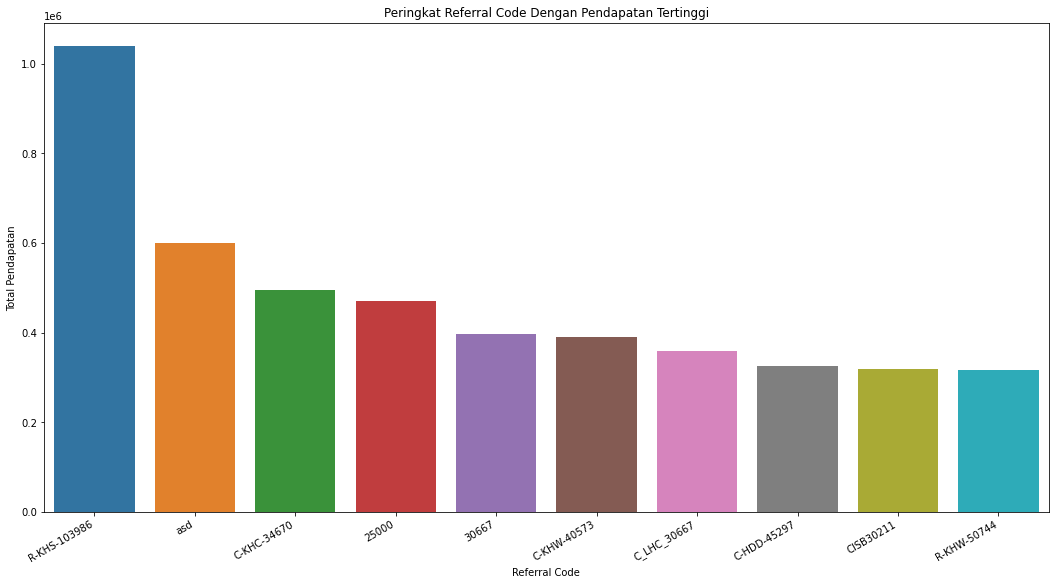

In [81]:
plt.figure(figsize = (18,9))
ax = sns.barplot(x="sales_commission_code", data=category_coms, y='grand_total')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.title('Peringkat Referral Code Dengan Pendapatan Tertinggi')
plt.xlabel('Referral Code')
plt.ylabel('Total Pendapatan')
plt.show()

Grafik diatas menunjukan 10 referral kode dengan nilai transaksi tertinggi selama 2 tahun

## Summary
* Mayoritas konsumen melakukan pembelian dengan jumlah barang hanya 1 item setiap transaksi
* 50% konsumen melakukan pembelian barang yang memiliki harga kurang dari Rs 900
* *Mobiles and tablets* adalah kategori yang mencetak jumlah transaksi tertinggi dan juga menghasilkan pendapatan terbaik
* *Men fashion* hanya dapat meraih posisi ke-5 dalam peringkat pendapatan yang diperoleh meskipun menjadi posisi kedua dalam peringkat jumlah pemesanan
* Jumlah transaksi selesai lebih banyak ketimbang transaksi dengan status dibatalkan, dikembalikan dan ditangguhkan apabila dijumlah
* *Mobiles and tablets* menjadi kategori tertinggi dalam jumlah transaksi yang dibatalkan hingga melebihi jumlah transaksi yang selesai.
* *Mobiles and tablets* juga menjadi kategori dengan jumlah pendapatan tertinggi pada transaksi dengan potongan harga
* Bulan November pada tahun 2017 menjadi bulan yang mencetak jumlah pendapatan tertinggi dalam rentang waktu bulan Juli tahun 2016 hingga Agustus tahun 2018
* *Cash on delivery* atau 'cod' menjadi metode pembayaran paling populer yang digunakan oleh konsumen
* *Cash on delivery* atau 'cod' merupakan satu - satunya metode pembayaran dengan presentase transaksi yang selesai lebih tinggi ketimbang yang dibatalkan apabila dibandingkan dengan metode pembayaran lain
* Total belanja dari seluruh transaksi yang terdapat referral code dapat melebihi jumlah transaki tanpa referral code

## Recommendation
1. Membuat program potongan harga untuk pembelian items dengan jumlah lebih dari 1 dan program bundling agar mendorong rata - rata jumlah items setiap transaksi.
2. Mendorong divisi purchasing untuk menambahkan variasi items dengan harga yang terbilang rendah (rentang harga di bawah Rs 900) karena jauh mengungguli dalam hal jumlah penjualan ketimbang items dengan harga yang terbilang tinggi
3. Membuat program potongan harga apabila transaksi menggunakan metode pembayaran cash on delivery untuk menambahkan awareness konsumen mengenai metode pembayaran tersebut. diharapkan dapat mendorong jumlah transaksi dan juga meningkatkan presentase transaksi dengan status 'complete'
4. Mendorong divisi marketing untuk melakukan upaya promosi barang - barang dalam kategori mobiles and tablets seperti dengan menambah presentase potongan harga,retargeting ads, email marketing, dan upaya - upaya lain guna menambah volume transaksi dalam kategori mobiles and tablets.
5. Melakukan alih daya atau outsourcing untuk menanggulangi lonjakan transaksi pada bulan november setiap tahunnya.
6. Mengurangi jumlah stok dari barang - barang dalam kategori men fashion yang mana merupakan kategori yang berada pada posisi 2 dalam jumlah transaksi terbanyak namun hanya di posisi 5 dalam total nilai transaksi. Diharapkan dapat mengurangi biaya operasional dalam menyelesaikan transaksi barang pada kategori men fashion
7. Menampilkan peringkat referral code berdasarkan total transaksi tertinggi dan memberikan apresiasi pada para affiliator untuk mendorong konsumen lain agar mengunggah referal code mereka masing2 di media sosial 